## Trabajo 02 Renta fija Sql y python - Laura Rojas - Edwin Rios

#### Librerias

In [331]:
import mysql.connector
import datetime as dt
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

import time


In [332]:
import os
import sys
import inspect

In [333]:
import Clase_6.Funciones as funciones
from Clase_6.Funciones import DB_class
import Clase_6.Clase_6Fun as clase_6Fun

--funciones\
    |-DB_class\
    |-coupon_m(parametros)\
    |-discount_factor_m(parametros)\
    |-dirty_price_m(parametros)\
    |-dirty_price_1i(parametros,inst_pos)\
    |-ytm_1d_obj_func(x,i,params,prices)\
    |-find_ytm_loop(parametros,prices)\
    |-ytm_obj_func(x,params,prices)\
    |-find_ytm_m(parametros,prices)\
    |-NelsonSiegel_1d(params, ven)\
    |-NelsonSiegel_m(params, ven)\
    |-dirty_price_m_ns(betas,parametros)\
    |-objetive_function(betas,parametros)\
    |-betas_optimization(parametros)\
    |-betas_optimization_bound(parametros)\

--Clase_6Fun\
    |-Macaulay_duration_mat(parametros,prices)\
    |-Modified_duration_mat(parametros,prices)\
    |-Modified_duration_mat_2(parametros,prices,macaulay_duration)\
    |-Convexity_mat(parametros,prices)\
    |-Macaulay_duration_mat_loop(parametros,prices)\
    |-Modified_duration_mat_loop(parametros,prices)\
    |-Modified_duration_mat_loop_2(parametros,prices,macaulay_duration)\
    |-Convexity_mat_loop(parametros,prices)\
    |-objetive_function_prices(betas,parametros)\
    |-betas_optimization_bound_prices(parametros)\

In [334]:
import itertools
import importlib

## Cargue base de datos TES

In [415]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class2_db = db_object.open_db()
mi_cursor = class2_db.cursor()
query = (
'SELECT '+\
'trabajo_2.tabla_precios.Tipo,'+\
'trabajo_2.tabla_precios.Indice_tipo,'+\
'trabajo_2.tabla_precios.fecha_valoracion,'+\
'trabajo_2.tabla_precios.nemotecnico,'+\
'trabajo_2.tabla_precios.fecha_emision,'+\
'trabajo_2.tabla_precios.fecha_vencimiento,'+\
'trabajo_2.tabla_precios.cupon,'+\
'trabajo_2.tabla_precios.tir,'+\
'trabajo_2.tabla_precios.frecuencia_pago,'+\
'trabajo_2.tabla_precios.Indicador_indexado,'+\
'trabajo_2.tabla_precios.conteo_dias,'+\
'trabajo_2.tabla_indices.Indice_c,'+\
'trabajo_2.tabla_indices.fecha_indice,'+\
'trabajo_2.tabla_indices.valor '+\
'FROM trabajo_2.tabla_precios '+\
'left join trabajo_2.tabla_indices '+\
'on '+\
'concat(trabajo_2.tabla_indices.Indice_c,trabajo_2.tabla_indices.fecha_indice) ='+\
'concat(trabajo_2.tabla_precios.Indicador_indexado,trabajo_2.tabla_precios.fecha_valoracion) '+\
'where '+\
'trabajo_2.tabla_precios.Tipo in (\'T1\',\'T2\',\'T3\',\'T4\',\'T5\') '+\
'order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo'
)
tes_faciales_500 = pd.read_sql(query, con=class2_db)
display(tes_faciales_500)

C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Tipo,Indice_tipo,fecha_valoracion,nemotecnico,fecha_emision,fecha_vencimiento,cupon,tir,frecuencia_pago,Indicador_indexado,conteo_dias,Indice_c,fecha_indice,valor
0,T1,1,2022-09-18,CDTOCSS6V,2012-04-12,2023-04-12,6.0,4.021916,6,No,REAL/365,No,2022-09-18,0.0
1,T1,2,2022-09-18,CDTGEDS6V,2012-08-26,2023-08-26,6.0,4.760056,6,No,REAL/365,No,2022-09-18,0.0
2,T1,3,2022-09-18,CDTDXAS6V,2012-05-15,2024-05-15,6.0,5.905344,6,No,REAL/365,No,2022-09-18,0.0
3,T1,4,2022-09-18,CDTVFTS6V,2012-07-24,2024-07-24,7.0,6.157886,6,No,REAL/365,No,2022-09-18,0.0
4,T1,5,2022-09-18,CDTAOFS6V,2014-12-20,2024-12-20,5.0,6.634711,6,No,REAL/365,No,2022-09-18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,T5,96,2022-09-18,TUVTZT360,2021-02-13,2050-02-13,3.0,9.828134,12,No,REAL/360,No,2022-09-18,0.0
496,T5,97,2022-09-18,TUVTYO360,2017-09-04,2050-09-04,3.0,9.843179,12,No,REAL/360,No,2022-09-18,0.0
497,T5,98,2022-09-18,TUVTXV360,2015-06-16,2050-06-16,5.0,9.837320,12,No,REAL/360,No,2022-09-18,0.0
498,T5,99,2022-09-18,TUVTHB360,2020-11-19,2050-11-19,5.0,9.848664,12,No,REAL/360,No,2022-09-18,0.0


## Calculo precio sucio para todos los 500 titulos

In [416]:
val_date= tes_faciales_500.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales_500.fecha_emision
fin_date = tes_faciales_500.fecha_vencimiento
cpn =  tes_faciales_500.cupon
discount_rates = tes_faciales_500.tir.copy()
frec_pag=tes_faciales_500.frecuencia_pago
indicador=tes_faciales_500.valor
conteo_dias=tes_faciales_500.conteo_dias
discount_rates_ind=((1+discount_rates/100)*(1+indicador/100)-1)*100


discount_rates_consol=tes_faciales_500.tir.copy()
for i in range(len(discount_rates)):
    if indicador[i]==0:
        discount_rates_consol[i]=discount_rates[i]
    else:
        discount_rates_consol[i]=discount_rates_ind[i]


In [301]:
### titulos
#mul_inst = 1 #intentar 1, 100 y 10000
#parametros = dict({
#        'val_date':val_date, 
#        'ini_date':np.tile(ini_date,mul_inst), 
#        'fin_date':np.tile(fin_date,mul_inst), 
#        'coupon':np.tile(cpn,mul_inst),
#        'discount_rates':np.tile(discount_rates_consol,mul_inst),
#        'conteo_dias':np.tile(conteo_dias,mul_inst),
#        'frec_pag':np.tile(frec_pag,mul_inst),
#        'indicador':np.tile(indicador,mul_inst),
#        'limits':np.array([-20,20])
#        })

In [417]:
parametros_500 = dict({
        'val_date':val_date, 
        'ini_date':ini_date, 
        'fin_date':fin_date, 
        'coupon':cpn,
        'discount_rates':discount_rates_consol,
        'conteo_dias':conteo_dias,
        'frec_pag':frec_pag,
        'indicador':indicador,
        'limits':np.array([-20,20])
        })

In [306]:
importlib.reload(funciones)

<module 'Clase_6.Funciones' from 'd:\\cursos\\Maestria finanzas\\S3_PySql rent fij\\Trabajo02\\Clase_6\\Funciones.py'>

In [418]:
n_inst = len(parametros_500['coupon'])
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_mGen(parametros_500)
parametros_500['cpn_dict'] = coupon_dict

parametros_500['delta_t'] = coupon_dict['days_matrix']
parametros_500['discount_factors'] = funciones.discount_factor_m(parametros_500)

prices = funciones.dirty_price_m(parametros_500)
parametros_500['mkt_prices'] = prices


In [420]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()

nemos=np.array(tes_faciales_500.nemotecnico)
for i in range(nemos.shape[0]):
    insert_1 = ("UPDATE trabajo_2.tabla_precios SET"
            " precio_sucio = %s "
            "WHERE nemotecnico = %s"
            )

    valores = (parametros_500['mkt_prices'] [i], nemos[i])
    mi_cursor = class6_db.cursor()
    mi_cursor.execute(insert_1, valores)

    class6_db.commit()

In [12]:
os.getcwd()

In [14]:
Df_resultadoPrice=tes_faciales_500
Df_resultadoPrice['priceC']=prices
Df_resultadoPrice.to_excel (r'd:/cursos/Maestria finanzas/S3_PySql rent fij/Trabajo02/calculoprecio.xlsx', index = False, header=True)


## 5 Optimizacion y curvas para cada tipo de titulo

### Curva para titulos T1

In [460]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()
query = (
'SELECT '+\
'trabajo_2.tabla_precios.Tipo,'+\
'trabajo_2.tabla_precios.Indice_tipo,'+\
'trabajo_2.tabla_precios.fecha_valoracion,'+\
'trabajo_2.tabla_precios.nemotecnico,'+\
'trabajo_2.tabla_precios.fecha_emision,'+\
'trabajo_2.tabla_precios.fecha_vencimiento,'+\
'trabajo_2.tabla_precios.cupon,'+\
'trabajo_2.tabla_precios.tir,'+\
'trabajo_2.tabla_precios.frecuencia_pago,'+\
'trabajo_2.tabla_precios.Indicador_indexado,'+\
'trabajo_2.tabla_precios.conteo_dias,'+\
'trabajo_2.tabla_indices.Indice_c,'+\
'trabajo_2.tabla_indices.fecha_indice,'+\
'trabajo_2.tabla_indices.valor '+\
'FROM trabajo_2.tabla_precios '+\
'left join trabajo_2.tabla_indices '+\
'on '+\
'concat(trabajo_2.tabla_indices.Indice_c,trabajo_2.tabla_indices.fecha_indice) ='+\
'concat(trabajo_2.tabla_precios.Indicador_indexado,trabajo_2.tabla_precios.fecha_valoracion) '+\
'where '+\
'trabajo_2.tabla_precios.Tipo in (\'T1\') '+\
'order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo'
)
tes_faciales = pd.read_sql(query, con=class6_db)

C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [461]:
val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir
frec_pag=tes_faciales.frecuencia_pago

In [462]:
parametros = dict({
        'val_date':val_date, 
        'ini_date':ini_date, 
        'fin_date':fin_date,
        'frec_pag':frec_pag, 
        'coupon':cpn,
        'discount_rates': discount_rates,
        'limits':np.array([0,200])
        })


In [463]:
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_m365(parametros)
parametros['cpn_dict'] = coupon_dict
parametros['delta_t'] = coupon_dict['days_matrix']/365
prices_01= funciones.dirty_price_m(parametros)

parametros['mkt_prices'] = funciones.dirty_price_m(parametros)

##### Calcular los betas
venc = coupon_dict['days_matrix']/365

In [464]:
################ Optimizacion por precios
parametros['limits'] = np.array([0,200])
ini = time.time()
optimiz_result = clase_6Fun.betas_optimization_bound_prices(parametros)
fin = time.time()
betas_opt = optimiz_result.copy()
curva = funciones.NelsonSiegel_m(betas_opt, venc)
print(f'El algortimo de optimizacion por fuerza bruta en Precio tarda {(fin-ini):.2f} segundos')
#se demora menos de un min

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:584: RuntimeWarning: divide by zero encountered in true_divide
  y = beta_0+params[1]*((1-np.exp(-ven/params[3]))/(ven/params[3]))+\
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:585: RuntimeWarning: divide by zero encountered in true_divide
  params[2]*((1-np.exp(-ven/params[3]))/(ven/params[3])- \
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:586: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-ven/params[3]))


El algortimo de optimizacion por fuerza bruta en Precio tarda 74.89 segundos


d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:621: RuntimeWarning: overflow encountered in exp
  disc_factors = np.exp(np.multiply(-model_curve.T, venc)).T
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:623: RuntimeWarning: invalid value encountered in matmul
  dirty_prices = np.matmul(cpn_m.T,disc_factors)


In [465]:
#Evaluar los precios, las TIRs y la funcion objetivo 
prices_opt = funciones.dirty_price_m_ns(betas_opt,parametros)
tirs_opt = funciones.find_ytm_loop(parametros,prices_opt)
funciones.find_ytm_loop(parametros,prices_opt)
clase_6Fun.objetive_function_prices(betas_opt,parametros)
funciones.objetive_function(betas_opt,parametros)

45.67289064076184

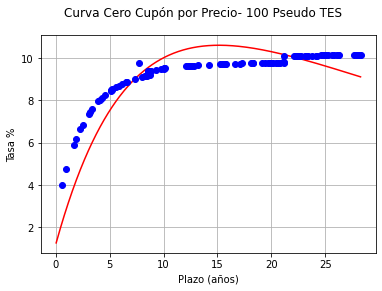

In [466]:
###Grafica
y_term = [(fin_date[k]-val_date).days/365 for k in range(len(fin_date))]
plt.plot(venc.T, curva*100,'r')
plt.plot(np.array(y_term), np.array(discount_rates),'bo')
plt.grid(True)
plt.ylabel('Tasa %')
plt.xlabel('Plazo (años)')
plt.suptitle('Curva Cero Cupón por Precio- 100 Pseudo TES')
#plt.savefig(cwd+'\\Clase_6\\N&S-Price_Opt.png')
plt.show()

In [408]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()

Tipo_titulo='T1'
insert_1 = ("UPDATE trabajo_2.curvas SET"
        " Tipo = %s,"
        "b0 = %s,"
        "b1 = %s,"
        "b2 = %s,"
        "b3 = %s"
        " WHERE Tipo = %s"
        )

valores = (Tipo_titulo, betas_opt[0],betas_opt[1],betas_opt[2], betas_opt[3], Tipo_titulo)
mi_cursor = class6_db.cursor()
mi_cursor.execute(insert_1, valores)

class6_db.commit()

In [470]:
T1_Plazo=np.array(venc.T)
T1_Tasas=np.array(curva*100)

### Curva para titulos T2

In [471]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()
query = (
'SELECT '+\
'trabajo_2.tabla_precios.Tipo,'+\
'trabajo_2.tabla_precios.Indice_tipo,'+\
'trabajo_2.tabla_precios.fecha_valoracion,'+\
'trabajo_2.tabla_precios.nemotecnico,'+\
'trabajo_2.tabla_precios.fecha_emision,'+\
'trabajo_2.tabla_precios.fecha_vencimiento,'+\
'trabajo_2.tabla_precios.cupon,'+\
'trabajo_2.tabla_precios.tir,'+\
'trabajo_2.tabla_precios.frecuencia_pago,'+\
'trabajo_2.tabla_precios.Indicador_indexado,'+\
'trabajo_2.tabla_precios.conteo_dias,'+\
'trabajo_2.tabla_indices.Indice_c,'+\
'trabajo_2.tabla_indices.fecha_indice,'+\
'trabajo_2.tabla_indices.valor '+\
'FROM trabajo_2.tabla_precios '+\
'left join trabajo_2.tabla_indices '+\
'on '+\
'concat(trabajo_2.tabla_indices.Indice_c,trabajo_2.tabla_indices.fecha_indice) ='+\
'concat(trabajo_2.tabla_precios.Indicador_indexado,trabajo_2.tabla_precios.fecha_valoracion) '+\
'where '+\
'trabajo_2.tabla_precios.Tipo in (\'T2\') '+\
'order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo'
)
tes_faciales = pd.read_sql(query, con=class6_db)

C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [472]:
val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir.copy()
frec_pag=tes_faciales.frecuencia_pago
indicador=tes_faciales.valor
conteo_dias=tes_faciales.conteo_dias
discount_rates_ind=((1+discount_rates/100)*(1+indicador/100)-1)*100

discount_rates_consol=tes_faciales.tir.copy()
for i in range(len(discount_rates)):
    if indicador[i]==0:
        discount_rates_consol[i]=discount_rates[i]
    else:
        discount_rates_consol[i]=discount_rates_ind[i]

In [473]:
parametros = dict({
        'val_date':val_date, 
        'ini_date':ini_date, 
        'fin_date':fin_date,
        'coupon':cpn,
        'discount_rates': discount_rates,
        'conteo_dias': conteo_dias,
        'frec_pag':frec_pag, 
        'indicador':indicador,
        'limits':np.array([0,200])
        })


In [474]:
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_m365ind(parametros)
parametros['cpn_dict'] = coupon_dict
parametros['delta_t'] = coupon_dict['days_matrix']/365
prices_01= funciones.dirty_price_m(parametros)

parametros['mkt_prices'] = funciones.dirty_price_m(parametros)

##### Calcular los betas
venc = coupon_dict['days_matrix']/365

In [475]:
################ Optimizacion por precios
parametros['limits'] = np.array([0,200])
ini = time.time()
optimiz_result = clase_6Fun.betas_optimization_bound_prices(parametros)
fin = time.time()
betas_opt = optimiz_result.copy()
curva = funciones.NelsonSiegel_m(betas_opt, venc)
print(f'El algortimo de optimizacion por fuerza bruta en Precio tarda {(fin-ini):.2f} segundos')
#se demora menos de un min

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:584: RuntimeWarning: divide by zero encountered in true_divide
  y = beta_0+params[1]*((1-np.exp(-ven/params[3]))/(ven/params[3]))+\
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:585: RuntimeWarning: divide by zero encountered in true_divide
  params[2]*((1-np.exp(-ven/params[3]))/(ven/params[3])- \
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:586: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-ven/params[3]))


El algortimo de optimizacion por fuerza bruta en Precio tarda 42.32 segundos


d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:621: RuntimeWarning: overflow encountered in exp
  disc_factors = np.exp(np.multiply(-model_curve.T, venc)).T


In [476]:
#Evaluar los precios, las TIRs y la funcion objetivo 
prices_opt = funciones.dirty_price_m_ns(betas_opt,parametros)
tirs_opt = funciones.find_ytm_loop(parametros,prices_opt)
funciones.find_ytm_loop(parametros,prices_opt)
clase_6Fun.objetive_function_prices(betas_opt,parametros)
funciones.objetive_function(betas_opt,parametros)

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:439: RuntimeWarning: invalid value encountered in power
  disc = (1/(1+d_r/100)**delta_t).T


9372.115445664724

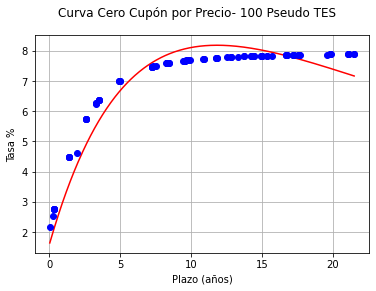

In [477]:
###Grafica
y_term = [(fin_date[k]-val_date).days/365 for k in range(len(fin_date))]
plt.plot(venc.T, curva*100,'r')
plt.plot(np.array(y_term), np.array(discount_rates),'bo')
plt.grid(True)
plt.ylabel('Tasa %')
plt.xlabel('Plazo (años)')
plt.suptitle('Curva Cero Cupón por Precio- 100 Pseudo TES')
#plt.savefig(cwd+'\\Clase_6\\N&S-Price_Opt.png')
plt.show()

In [435]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()

Tipo_titulo='T2'
insert_1 = ("UPDATE trabajo_2.curvas SET"
        " Tipo = %s,"
        "b0 = %s,"
        "b1 = %s,"
        "b2 = %s,"
        "b3 = %s"
        " WHERE Tipo = %s"
        )

valores = (Tipo_titulo, betas_opt[0],betas_opt[1],betas_opt[2], betas_opt[3], Tipo_titulo)
mi_cursor = class6_db.cursor()
mi_cursor.execute(insert_1, valores)

class6_db.commit()

In [478]:
T2_Plazo=np.array(venc.T)
T2_Tasas=np.array(curva*100)

### Curva para titulos T3

In [479]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()
query = (
'SELECT '+\
'trabajo_2.tabla_precios.Tipo,'+\
'trabajo_2.tabla_precios.Indice_tipo,'+\
'trabajo_2.tabla_precios.fecha_valoracion,'+\
'trabajo_2.tabla_precios.nemotecnico,'+\
'trabajo_2.tabla_precios.fecha_emision,'+\
'trabajo_2.tabla_precios.fecha_vencimiento,'+\
'trabajo_2.tabla_precios.cupon,'+\
'trabajo_2.tabla_precios.tir,'+\
'trabajo_2.tabla_precios.frecuencia_pago,'+\
'trabajo_2.tabla_precios.Indicador_indexado,'+\
'trabajo_2.tabla_precios.conteo_dias,'+\
'trabajo_2.tabla_indices.Indice_c,'+\
'trabajo_2.tabla_indices.fecha_indice,'+\
'trabajo_2.tabla_indices.valor '+\
'FROM trabajo_2.tabla_precios '+\
'left join trabajo_2.tabla_indices '+\
'on '+\
'concat(trabajo_2.tabla_indices.Indice_c,trabajo_2.tabla_indices.fecha_indice) ='+\
'concat(trabajo_2.tabla_precios.Indicador_indexado,trabajo_2.tabla_precios.fecha_valoracion) '+\
'where '+\
'trabajo_2.tabla_precios.Tipo in (\'T3\') '+\
'order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo'
)
tes_faciales = pd.read_sql(query, con=class6_db)

C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [480]:
val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir.copy()
frec_pag=tes_faciales.frecuencia_pago
indicador=tes_faciales.valor
conteo_dias=tes_faciales.conteo_dias
discount_rates_ind=((1+discount_rates/100)*(1+indicador/100)-1)*100

discount_rates_consol=tes_faciales.tir.copy()
for i in range(len(discount_rates)):
    if indicador[i]==0:
        discount_rates_consol[i]=discount_rates[i]
    else:
        discount_rates_consol[i]=discount_rates_ind[i]

In [481]:
parametros = dict({
        'val_date':val_date, 
        'ini_date':ini_date, 
        'fin_date':fin_date,
        'coupon':cpn,
        'discount_rates': discount_rates,
        'conteo_dias': conteo_dias,
        'frec_pag':frec_pag, 
        'indicador':indicador,
        'limits':np.array([0,100])
        })

In [482]:
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_m365(parametros)
parametros['cpn_dict'] = coupon_dict
parametros['delta_t'] = coupon_dict['days_matrix']/365
prices_01= funciones.dirty_price_m(parametros)

parametros['mkt_prices'] = funciones.dirty_price_m(parametros)

##### Calcular los betas
venc = coupon_dict['days_matrix']/365

In [483]:
################ Optimizacion por precios
parametros['limits'] = np.array([0,100])
ini = time.time()
optimiz_result = clase_6Fun.betas_optimization_bound_prices(parametros)
fin = time.time()
betas_opt = optimiz_result.copy()
curva = funciones.NelsonSiegel_m(betas_opt, venc)
print(f'El algortimo de optimizacion por fuerza bruta en Precio tarda {(fin-ini):.2f} segundos')
#se demora menos de un min

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:584: RuntimeWarning: divide by zero encountered in true_divide
  y = beta_0+params[1]*((1-np.exp(-ven/params[3]))/(ven/params[3]))+\
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:585: RuntimeWarning: divide by zero encountered in true_divide
  params[2]*((1-np.exp(-ven/params[3]))/(ven/params[3])- \
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:586: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-ven/params[3]))


El algortimo de optimizacion por fuerza bruta en Precio tarda 29.58 segundos


In [484]:
#Evaluar los precios, las TIRs y la funcion objetivo 
prices_opt = funciones.dirty_price_m_ns(betas_opt,parametros)
tirs_opt = funciones.find_ytm_loop(parametros,prices_opt)
funciones.find_ytm_loop(parametros,prices_opt)
clase_6Fun.objetive_function_prices(betas_opt,parametros)
funciones.objetive_function(betas_opt,parametros)

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:439: RuntimeWarning: invalid value encountered in power
  disc = (1/(1+d_r/100)**delta_t).T


10291.958255162534

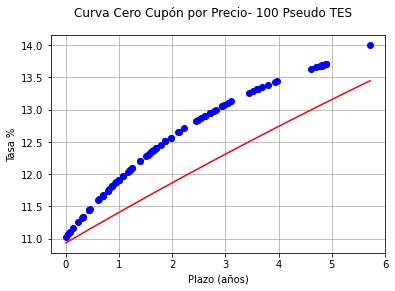

In [485]:
###Grafica
y_term = [(fin_date[k]-val_date).days/365 for k in range(len(fin_date))]
plt.plot(venc.T, curva*100,'r')
plt.plot(np.array(y_term), np.array(discount_rates),'bo')
plt.grid(True)
plt.ylabel('Tasa %')
plt.xlabel('Plazo (años)')
plt.suptitle('Curva Cero Cupón por Precio- 100 Pseudo TES')
#plt.savefig(cwd+'\\Clase_6\\N&S-Price_Opt.png')
plt.show()

In [443]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()

Tipo_titulo='T3'
insert_1 = ("UPDATE trabajo_2.curvas SET"
        " Tipo = %s,"
        "b0 = %s,"
        "b1 = %s,"
        "b2 = %s,"
        "b3 = %s"
        " WHERE Tipo = %s"
        )

valores = (Tipo_titulo, betas_opt[0],betas_opt[1],betas_opt[2], betas_opt[3], Tipo_titulo)
mi_cursor = class6_db.cursor()
mi_cursor.execute(insert_1, valores)

class6_db.commit()

In [486]:
T3_Plazo=np.array(venc.T)
T3_Tasas=np.array(curva*100)

### Curva para titulos T4

In [487]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()
query = (
'SELECT '+\
'trabajo_2.tabla_precios.Tipo,'+\
'trabajo_2.tabla_precios.Indice_tipo,'+\
'trabajo_2.tabla_precios.fecha_valoracion,'+\
'trabajo_2.tabla_precios.nemotecnico,'+\
'trabajo_2.tabla_precios.fecha_emision,'+\
'trabajo_2.tabla_precios.fecha_vencimiento,'+\
'trabajo_2.tabla_precios.cupon,'+\
'trabajo_2.tabla_precios.tir,'+\
'trabajo_2.tabla_precios.frecuencia_pago,'+\
'trabajo_2.tabla_precios.Indicador_indexado,'+\
'trabajo_2.tabla_precios.conteo_dias,'+\
'trabajo_2.tabla_indices.Indice_c,'+\
'trabajo_2.tabla_indices.fecha_indice,'+\
'trabajo_2.tabla_indices.valor '+\
'FROM trabajo_2.tabla_precios '+\
'left join trabajo_2.tabla_indices '+\
'on '+\
'concat(trabajo_2.tabla_indices.Indice_c,trabajo_2.tabla_indices.fecha_indice) ='+\
'concat(trabajo_2.tabla_precios.Indicador_indexado,trabajo_2.tabla_precios.fecha_valoracion) '+\
'where '+\
'trabajo_2.tabla_precios.Tipo in (\'T4\') '+\
'order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo'
)
tes_faciales = pd.read_sql(query, con=class6_db)

C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [488]:
val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir.copy()
frec_pag=tes_faciales.frecuencia_pago
indicador=tes_faciales.valor
conteo_dias=tes_faciales.conteo_dias
discount_rates_ind=((1+discount_rates/100)*(1+indicador/100)-1)*100

discount_rates_consol=tes_faciales.tir.copy()
for i in range(len(discount_rates)):
    if indicador[i]==0:
        discount_rates_consol[i]=discount_rates[i]
    else:
        discount_rates_consol[i]=discount_rates_ind[i]

In [489]:
parametros = dict({
        'val_date':val_date, 
        'ini_date':ini_date, 
        'fin_date':fin_date,
        'coupon':cpn,
        'discount_rates': discount_rates,
        'conteo_dias': conteo_dias,
        'frec_pag':frec_pag, 
        'indicador':indicador,
        'limits':np.array([0,100])
        })

In [490]:
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_m365(parametros)
parametros['cpn_dict'] = coupon_dict
parametros['delta_t'] = coupon_dict['days_matrix']/365
prices_01= funciones.dirty_price_m(parametros)

parametros['mkt_prices'] = funciones.dirty_price_m(parametros)

##### Calcular los betas
venc = coupon_dict['days_matrix']/365

In [491]:
################ Optimizacion por precios
parametros['limits'] = np.array([0,150])
ini = time.time()
optimiz_result = clase_6Fun.betas_optimization_bound_prices(parametros)
fin = time.time()
betas_opt = optimiz_result.copy()
curva = funciones.NelsonSiegel_m(betas_opt, venc)
print(f'El algortimo de optimizacion por fuerza bruta en Precio tarda {(fin-ini):.2f} segundos')
#se demora menos de un min

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:584: RuntimeWarning: divide by zero encountered in true_divide
  y = beta_0+params[1]*((1-np.exp(-ven/params[3]))/(ven/params[3]))+\
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:585: RuntimeWarning: divide by zero encountered in true_divide
  params[2]*((1-np.exp(-ven/params[3]))/(ven/params[3])- \
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:586: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-ven/params[3]))


El algortimo de optimizacion por fuerza bruta en Precio tarda 31.36 segundos


d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:621: RuntimeWarning: overflow encountered in exp
  disc_factors = np.exp(np.multiply(-model_curve.T, venc)).T


In [492]:
#Evaluar los precios, las TIRs y la funcion objetivo 
prices_opt = funciones.dirty_price_m_ns(betas_opt,parametros)
tirs_opt = funciones.find_ytm_loop(parametros,prices_opt)
funciones.find_ytm_loop(parametros,prices_opt)
clase_6Fun.objetive_function_prices(betas_opt,parametros)
funciones.objetive_function(betas_opt,parametros)

7770.444957521277

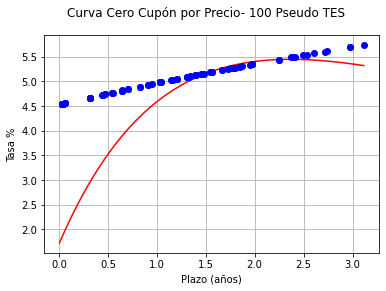

In [493]:
###Grafica
y_term = [(fin_date[k]-val_date).days/365 for k in range(len(fin_date))]
plt.plot(venc.T, curva*100,'r')
plt.plot(np.array(y_term), np.array(discount_rates),'bo')
plt.grid(True)
plt.ylabel('Tasa %')
plt.xlabel('Plazo (años)')
plt.suptitle('Curva Cero Cupón por Precio- 100 Pseudo TES')
#plt.savefig(cwd+'\\Clase_6\\N&S-Price_Opt.png')
plt.show()

In [451]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()

Tipo_titulo='T4'
insert_1 = ("UPDATE trabajo_2.curvas SET"
        " Tipo = %s,"
        "b0 = %s,"
        "b1 = %s,"
        "b2 = %s,"
        "b3 = %s"
        " WHERE Tipo = %s"
        )

valores = (Tipo_titulo, betas_opt[0],betas_opt[1],betas_opt[2], betas_opt[3], Tipo_titulo)
mi_cursor = class6_db.cursor()
mi_cursor.execute(insert_1, valores)

class6_db.commit()

In [494]:
T4_Plazo=np.array(venc.T)
T4_Tasas=np.array(curva*100)

### Curva para titulos T5

In [495]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()
query = (
'SELECT '+\
'trabajo_2.tabla_precios.Tipo,'+\
'trabajo_2.tabla_precios.Indice_tipo,'+\
'trabajo_2.tabla_precios.fecha_valoracion,'+\
'trabajo_2.tabla_precios.nemotecnico,'+\
'trabajo_2.tabla_precios.fecha_emision,'+\
'trabajo_2.tabla_precios.fecha_vencimiento,'+\
'trabajo_2.tabla_precios.cupon,'+\
'trabajo_2.tabla_precios.tir,'+\
'trabajo_2.tabla_precios.frecuencia_pago,'+\
'trabajo_2.tabla_precios.Indicador_indexado,'+\
'trabajo_2.tabla_precios.conteo_dias,'+\
'trabajo_2.tabla_indices.Indice_c,'+\
'trabajo_2.tabla_indices.fecha_indice,'+\
'trabajo_2.tabla_indices.valor '+\
'FROM trabajo_2.tabla_precios '+\
'left join trabajo_2.tabla_indices '+\
'on '+\
'concat(trabajo_2.tabla_indices.Indice_c,trabajo_2.tabla_indices.fecha_indice) ='+\
'concat(trabajo_2.tabla_precios.Indicador_indexado,trabajo_2.tabla_precios.fecha_valoracion) '+\
'where '+\
'trabajo_2.tabla_precios.Tipo in (\'T5\') '+\
'order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo'
)
tes_faciales = pd.read_sql(query, con=class6_db)



C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [496]:
val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir.copy()
frec_pag=tes_faciales.frecuencia_pago
indicador=tes_faciales.valor
conteo_dias=tes_faciales.conteo_dias
discount_rates_ind=((1+discount_rates/100)*(1+indicador/100)-1)*100

discount_rates_consol=tes_faciales.tir.copy()
for i in range(len(discount_rates)):
    if indicador[i]==0:
        discount_rates_consol[i]=discount_rates[i]
    else:
        discount_rates_consol[i]=discount_rates_ind[i]

In [497]:
parametros = dict({
        'val_date':val_date, 
        'ini_date':ini_date, 
        'fin_date':fin_date,
        'coupon':cpn,
        'discount_rates': discount_rates,
        'conteo_dias': conteo_dias,
        'frec_pag':frec_pag, 
        'indicador':indicador,
        'limits':np.array([0,100])
        })


In [498]:
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_m360(parametros)
parametros['cpn_dict'] = coupon_dict
parametros['delta_t'] = coupon_dict['days_matrix']/360
prices_01= funciones.dirty_price_m(parametros)

parametros['mkt_prices'] = funciones.dirty_price_m(parametros)

##### Calcular los betas
venc = coupon_dict['days_matrix']/360

In [224]:
#Df_resultadoPrice=tes_faciales
#Df_resultadoPrice['priceC']=prices_01
#Df_resultadoPrice.to_excel (r'd:/cursos/Maestria finanzas/S3_PySql rent fij/Trabajo02/calculoprecioT5.xlsx', index = False, header=True)


In [499]:
################ Optimizacion por precios
parametros['limits'] = np.array([0,150])
ini = time.time()
optimiz_result = clase_6Fun.betas_optimization_bound_prices(parametros)
fin = time.time()
betas_opt = optimiz_result.copy()
curva = funciones.NelsonSiegel_m(betas_opt, venc)
print(f'El algortimo de optimizacion por fuerza bruta en Precio tarda {(fin-ini):.2f} segundos')
#se demora menos de un min

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:584: RuntimeWarning: divide by zero encountered in true_divide
  y = beta_0+params[1]*((1-np.exp(-ven/params[3]))/(ven/params[3]))+\
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:585: RuntimeWarning: divide by zero encountered in true_divide
  params[2]*((1-np.exp(-ven/params[3]))/(ven/params[3])- \
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:586: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-ven/params[3]))


El algortimo de optimizacion por fuerza bruta en Precio tarda 47.33 segundos


In [500]:
#Evaluar los precios, las TIRs y la funcion objetivo 
prices_opt = funciones.dirty_price_m_ns(betas_opt,parametros)
tirs_opt = funciones.find_ytm_loop(parametros,prices_opt)
funciones.find_ytm_loop(parametros,prices_opt)
clase_6Fun.objetive_function_prices(betas_opt,parametros)
funciones.objetive_function(betas_opt,parametros)

20.897498318949978

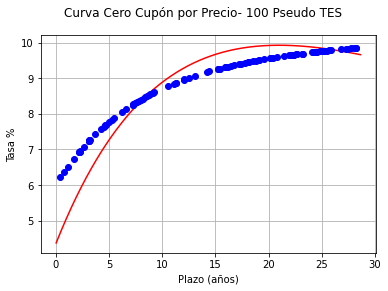

In [501]:
###Grafica
y_term = [(fin_date[k]-val_date).days/365 for k in range(len(fin_date))]
plt.plot(venc.T, curva*100,'r')
plt.plot(np.array(y_term), np.array(discount_rates),'bo')
plt.grid(True)
plt.ylabel('Tasa %')
plt.xlabel('Plazo (años)')
plt.suptitle('Curva Cero Cupón por Precio- 100 Pseudo TES')
#plt.savefig(cwd+'\\Clase_6\\N&S-Price_Opt.png')
plt.show()

In [459]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()

Tipo_titulo='T5'
insert_1 = ("UPDATE trabajo_2.curvas SET"
        " Tipo = %s,"
        "b0 = %s,"
        "b1 = %s,"
        "b2 = %s,"
        "b3 = %s"
        " WHERE Tipo = %s"
        )

valores = (Tipo_titulo, betas_opt[0],betas_opt[1],betas_opt[2], betas_opt[3], Tipo_titulo)
mi_cursor = class6_db.cursor()
mi_cursor.execute(insert_1, valores)

class6_db.commit()

In [502]:
T5_Plazo=np.array(venc.T)
T5_Tasas=np.array(curva*100)

## Carga tablas bonos

In [511]:
### Insertar datos T1
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()


for i in range(T1_Plazo.shape[0]):
    insert_1 = ("INSERT INTO trabajo_2.tabla_curvas (Tipo,Plazo,Tasas) VALUES "
            "(%s,%s,%s)"
            )

    valores = ('T1', T1_Plazo[i], T1_Tasas[i][0])
    mi_cursor = class6_db.cursor()
    mi_cursor.execute(insert_1, valores)

    class6_db.commit()

In [512]:
### Insertar datos T2
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()


for i in range(T2_Plazo.shape[0]):
    insert_1 = ("INSERT INTO trabajo_2.tabla_curvas (Tipo,Plazo,Tasas) VALUES "
            "(%s,%s,%s)"
            )

    valores = ('T2', T2_Plazo[i], T2_Tasas[i][0])
    mi_cursor = class6_db.cursor()
    mi_cursor.execute(insert_1, valores)

    class6_db.commit()

In [513]:
### Insertar datos T3
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()


for i in range(T3_Plazo.shape[0]):
    insert_1 = ("INSERT INTO trabajo_2.tabla_curvas (Tipo,Plazo,Tasas) VALUES "
            "(%s,%s,%s)"
            )

    valores = ('T3', T3_Plazo[i], T3_Tasas[i][0])
    mi_cursor = class6_db.cursor()
    mi_cursor.execute(insert_1, valores)

    class6_db.commit()

In [514]:
### Insertar datos T4
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()


for i in range(T4_Plazo.shape[0]):
    insert_1 = ("INSERT INTO trabajo_2.tabla_curvas (Tipo,Plazo,Tasas) VALUES "
            "(%s,%s,%s)"
            )

    valores = ('T4', T4_Plazo[i], T4_Tasas[i][0])
    mi_cursor = class6_db.cursor()
    mi_cursor.execute(insert_1, valores)

    class6_db.commit()

In [515]:
### Insertar datos T5
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()


for i in range(T5_Plazo.shape[0]):
    insert_1 = ("INSERT INTO trabajo_2.tabla_curvas (Tipo,Plazo,Tasas) VALUES "
            "(%s,%s,%s)"
            )

    valores = ('T5', T5_Plazo[i], T5_Tasas[i][0])
    mi_cursor = class6_db.cursor()
    mi_cursor.execute(insert_1, valores)

    class6_db.commit()

In [516]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class2_db = db_object.open_db()
mi_cursor = class2_db.cursor()
query = (
'SELECT * FROM trabajo_2.tabla_curvas '
        )
tabla_curvas = pd.read_sql(query, con=class2_db)
display(tabla_curvas)

C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Tipo,Plazo,Tasas
0,T1,0.021918,1.271115
1,T1,0.049315,1.321216
2,T1,0.063014,1.346187
3,T1,0.065753,1.351175
4,T1,0.068493,1.356161
...,...,...,...
5630,T5,27.805556,9.708706
5631,T5,28.147222,9.689133
5632,T5,28.369444,9.676072
5633,T5,28.580556,9.663432


### Pruebas FALLIDAS optimizacion

In [230]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class2_db = db_object.open_db()
mi_cursor = class2_db.cursor()
query = (
'SELECT '+\
'trabajo_2.tabla_precios.Tipo,'+\
'trabajo_2.tabla_precios.Indice_tipo,'+\
'trabajo_2.tabla_precios.fecha_valoracion,'+\
'trabajo_2.tabla_precios.nemotecnico,'+\
'trabajo_2.tabla_precios.fecha_emision,'+\
'trabajo_2.tabla_precios.fecha_vencimiento,'+\
'trabajo_2.tabla_precios.cupon,'+\
'trabajo_2.tabla_precios.tir,'+\
'trabajo_2.tabla_precios.frecuencia_pago,'+\
'trabajo_2.tabla_precios.Indicador_indexado,'+\
'trabajo_2.tabla_precios.conteo_dias,'+\
'trabajo_2.tabla_indices.Indice_c,'+\
'trabajo_2.tabla_indices.fecha_indice,'+\
'trabajo_2.tabla_indices.valor '+\
'FROM trabajo_2.tabla_precios '+\
'left join trabajo_2.tabla_indices '+\
'on '+\
'concat(trabajo_2.tabla_indices.Indice_c,trabajo_2.tabla_indices.fecha_indice) ='+\
'concat(trabajo_2.tabla_precios.Indicador_indexado,trabajo_2.tabla_precios.fecha_valoracion) '+\
'where '+\
'trabajo_2.tabla_precios.Tipo in (\'T5\') '+\
'order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo'
)
tes_faciales = pd.read_sql(query, con=class2_db)
display(tes_faciales)

C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Tipo,Indice_tipo,fecha_valoracion,nemotecnico,fecha_emision,fecha_vencimiento,cupon,tir,frecuencia_pago,Indicador_indexado,conteo_dias,Indice_c,fecha_indice,valor
0,T5,1,2022-09-18,TUVTKQ360,2018-02-23,2023-02-23,4.0,6.224317,12,No,REAL/360,No,2022-09-18,0.0
1,T5,2,2022-09-18,TUVATFJ360,2012-06-24,2023-06-24,3.0,6.368231,12,No,REAL/360,No,2022-09-18,0.0
2,T5,3,2022-09-18,TUVTRE360,2015-11-04,2023-11-04,3.0,6.519757,12,No,REAL/360,No,2022-09-18,0.0
3,T5,4,2022-09-18,TUVTAF360,2018-05-23,2024-05-23,4.0,6.736134,12,No,REAL/360,No,2022-09-18,0.0
4,T5,5,2022-09-18,TUVTXA360,2014-11-16,2024-11-16,4.0,6.914768,12,No,REAL/360,No,2022-09-18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,T5,96,2022-09-18,TUVTZT360,2021-02-13,2050-02-13,3.0,9.828134,12,No,REAL/360,No,2022-09-18,0.0
96,T5,97,2022-09-18,TUVTYO360,2017-09-04,2050-09-04,3.0,9.843179,12,No,REAL/360,No,2022-09-18,0.0
97,T5,98,2022-09-18,TUVTXV360,2015-06-16,2050-06-16,5.0,9.837320,12,No,REAL/360,No,2022-09-18,0.0
98,T5,99,2022-09-18,TUVTHB360,2020-11-19,2050-11-19,5.0,9.848664,12,No,REAL/360,No,2022-09-18,0.0


In [231]:
val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir.copy()
frec_pag=tes_faciales.frecuencia_pago
indicador=tes_faciales.valor
conteo_dias=tes_faciales.conteo_dias
discount_rates_ind=((1+discount_rates/100)*(1+indicador/100)-1)*100

discount_rates_consol=tes_faciales.tir.copy()
for i in range(len(discount_rates)):
    if indicador[i]==0:
        discount_rates_consol[i]=discount_rates[i]
    else:
        discount_rates_consol[i]=discount_rates_ind[i]

In [232]:
mul_inst = 1 #intentar 1, 100 y 10000
parametros = dict({
        'val_date':val_date, 
        'ini_date':np.tile(ini_date,mul_inst), 
        'fin_date':np.tile(fin_date,mul_inst), 
        'coupon':np.tile(cpn,mul_inst),
        'discount_rates':np.tile(discount_rates_consol,mul_inst),
        'conteo_dias':np.tile(conteo_dias,mul_inst),
        'frec_pag':np.tile(frec_pag,mul_inst),
        'indicador':np.tile(indicador,mul_inst),
        'limits':np.array([0,200])
        })

In [233]:
n_inst = len(parametros['coupon'])
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_mGen(parametros)
parametros['cpn_dict'] = coupon_dict

parametros['delta_t'] = coupon_dict['days_matrix']
parametros['discount_factors'] = funciones.discount_factor_m(parametros)
parametros['mkt_prices']  = funciones.dirty_price_m(parametros)

##### Calcular los betas
venc = coupon_dict['days_matrix']

In [234]:
################ Optimizacion por precios}
#T1 [5000,11000] 
#T2 [10,150] 1398.433544436016
#T3 [50,130] 9181.385117817237
#T4 [-16.2,1] 9774.326487644583

parametros['limits'] = np.array([0,200])
ini = time.time()
optimiz_result = clase_6Fun.betas_optimization_bound_prices(parametros)
fin = time.time()
betas_opt = optimiz_result.copy()
curva = funciones.NelsonSiegel_m(betas_opt, venc)
print(f'El algortimo de optimizacion por fuerza bruta en Precio tarda {(fin-ini):.2f} segundos')
#se demora menos de un min

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:584: RuntimeWarning: divide by zero encountered in true_divide
  y = beta_0+params[1]*((1-np.exp(-ven/params[3]))/(ven/params[3]))+\
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:585: RuntimeWarning: divide by zero encountered in true_divide
  params[2]*((1-np.exp(-ven/params[3]))/(ven/params[3])- \
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:586: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-ven/params[3]))


El algortimo de optimizacion por fuerza bruta en Precio tarda 49.63 segundos


In [235]:
#Evaluar los precios, las TIRs y la funcion objetivo 
prices_opt = funciones.dirty_price_m_ns(betas_opt,parametros)
tirs_opt = funciones.find_ytm_loop(parametros,prices_opt)
funciones.find_ytm_loop(parametros,prices_opt)
clase_6Fun.objetive_function_prices(betas_opt,parametros)
funciones.objetive_function(betas_opt,parametros)

6.495992266195993

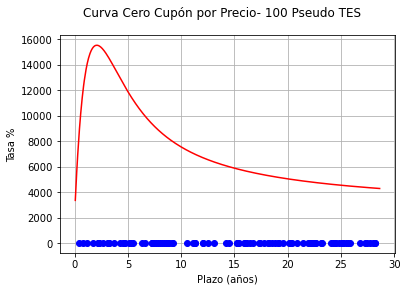

In [236]:
###Grafica
y_term = [(fin_date[k]-val_date).days/365 for k in range(len(fin_date))]

#axes = plt.axes()
#axes.set_ylim([0, 3])
plt.plot(venc.T, curva*100,'r')
plt.plot(np.array(y_term), np.array(discount_rates),'bo')
plt.grid(True)
plt.ylabel('Tasa %')
plt.xlabel('Plazo (años)')
plt.suptitle('Curva Cero Cupón por Precio- 100 Pseudo TES')
#plt.savefig(cwd+'\\Clase_6\\N&S-Price_Opt.png')
#plt.ylim(-2, 2)
plt.show()

## 7 Calculo medidas de riesgo duraciones y convexidad

In [421]:
import time
ini_0 = time.time()
mac_dur_m = clase_6Fun.Macaulay_duration_mat(parametros_500,prices).round(15)
ini_1 = time.time()
mod_dur_m_2 = clase_6Fun.Modified_duration_mat_2(parametros_500,prices,mac_dur_m).round(15)
fin_0 = time.time()
conv_m = clase_6Fun.Convexity_mat(parametros_500,prices).round(15)

In [422]:
ini_2 = time.time()
mac_dur_m_loop = clase_6Fun.Macaulay_duration_mat_loop(parametros_500,prices).round(15)
ini_3 = time.time()
mod_dur_m_loop_2 = clase_6Fun.Modified_duration_mat_loop_2(parametros_500,prices,mac_dur_m_loop).round(15)
ini_4 = time.time()
conv_m_loop = clase_6Fun.Convexity_mat_loop(parametros_500,prices).round(15)
fin_1 = time.time()

In [423]:
(mac_dur_m==mac_dur_m_loop).all()
(mod_dur_m_2 == mod_dur_m_loop_2).all()
(conv_m == conv_m_loop).all()

False

In [424]:
print(f'El calculo de duracion macaulay matricial para {n_inst} titulos, tardo {(ini_1-ini_0):.2f} segundos')
print(f'El calculo de duracion macaulay vect en loop para  {n_inst} titulos, tardo {(ini_3-ini_2):.2f} segundos')

print(f'El calculo de duracion modificada matricial para {n_inst} titulos,  tardo {(fin_0-ini_1):.2f} segundos')
print(f'El calculo de duracion modificada vect en loop para {n_inst} titulos, tardo {(ini_4-ini_3):.2f} segundos')

print(f'El calculo de la convexidad matricial para {n_inst} titulos, tardo {(ini_2-fin_0):.2f} segundos')
print(f'El calculo de la convexidad vect en loop para {n_inst} titulos, tardo {(fin_1-ini_4):.2f} segundos')


El calculo de duracion macaulay matricial para 500 titulos, tardo 0.02 segundos
El calculo de duracion macaulay vect en loop para  500 titulos, tardo 0.02 segundos
El calculo de duracion modificada matricial para 500 titulos,  tardo 0.00 segundos
El calculo de duracion modificada vect en loop para 500 titulos, tardo 0.00 segundos
El calculo de la convexidad matricial para 500 titulos, tardo 1.48 segundos
El calculo de la convexidad vect en loop para 500 titulos, tardo 0.02 segundos


### Cargar datos tabla precios

In [427]:
### Insertar datos
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()

nemos=np.array(tes_faciales_500.nemotecnico)
for i in range(nemos.shape[0]):
    insert_1 = ("UPDATE trabajo_2.tabla_precios SET "
            "duracion_mac = %s,"
            "duracion_mod = %s,"
            "Convexidad = %s"
            "WHERE nemotecnico = %s"
            )

    valores = (mac_dur_m_loop[i], mod_dur_m_loop_2[i], conv_m_loop[i],nemos[i])
    mi_cursor = class6_db.cursor()
    mi_cursor.execute(insert_1, valores)

    class6_db.commit()

### Calculo periodos por frecuencia evaluacion

In [120]:
tes_faciales.fecha_emision[0]
issue=dt.datetime.strptime(str(tes_faciales.fecha_emision[0]),'%Y-%m-%d').date()
periodos=10
frecuencia_0=3
years_0=0
months_0=0
arr = np.array([])
for i in range(periodos):
    if i==0:
        years_0=0
    elif (frecuencia_0*i)%12==0:
        years_0=(frecuencia_0*i)/12
    months_0=(frecuencia_0*i)%12
    
    respuesta=issue + relativedelta(years=years_0) +relativedelta(months=months_0) 
    arr = np.append(arr, respuesta)    
    #print(years_0,' - ',months_0,' - ',respuesta)
print(arr)

[datetime.date(2012, 9, 11) datetime.date(2012, 12, 11)
 datetime.date(2013, 3, 11) datetime.date(2013, 6, 11)
 datetime.date(2013, 9, 11) datetime.date(2013, 12, 11)
 datetime.date(2014, 3, 11) datetime.date(2014, 6, 11)
 datetime.date(2014, 9, 11) datetime.date(2014, 12, 11)]


In [393]:
Ej_bon=[]
Ej_bon_1=np.array([1,2,3])
Ej_bon_2=np.array([20,15,21])
Ej_bon_3=np.array([66,85,64])

In [394]:
Ej_bon.append(Ej_bon_1)
print(Ej_bon)
Ej_bon.append(Ej_bon_2)
print(Ej_bon)
Ej_bon.append(Ej_bon_3)
print(Ej_bon)

[array([1, 2, 3])]
[array([1, 2, 3]), array([20, 15, 21])]
[array([1, 2, 3]), array([20, 15, 21]), array([66, 85, 64])]


In [395]:
Ej_bon=np.array(Ej_bon)
print(Ej_bon)

[[ 1  2  3]
 [20 15 21]
 [66 85 64]]


In [382]:
Ej_bon=np.array([Ej_bon,Ej_bon_2])
print(Ej_bon)

[[ 1.  2.  3.]
 [20. 15. 21.]]


In [384]:
Ej_bon=np.array([Ej_bon,Ej_bon_3])
print(Ej_bon)

[array([array([[ 1.,  2.,  3.],
               [20., 15., 21.]]), array([66, 85, 64])], dtype=object)
 array([66, 85, 64])]


C:\Users\Edwin\AppData\Local\Temp\ipykernel_13404\1632659827.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Ej_bon=np.array([Ej_bon,Ej_bon_3])


In [379]:
Ej_bon[1]

array([20., 15., 21.])